<a href="https://colab.research.google.com/github/bryantosin1/Week3_PCVK/blob/main/Week3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


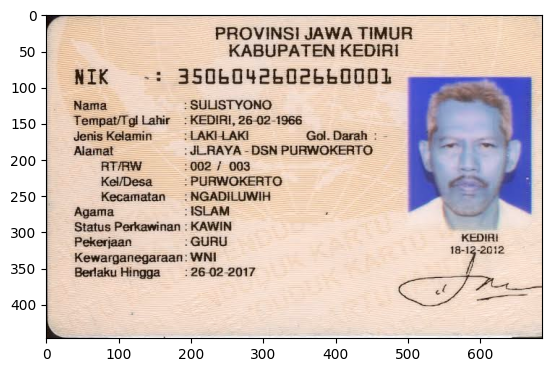

In [2]:
import cv2 as cv
import math
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PVCK/KTP.jpeg')
plt.imshow(img)

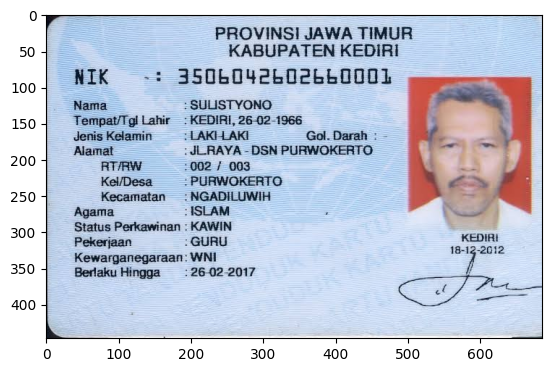

In [3]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:
g(x, y) = f(x, y) + b

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

Mengubah tingkat kecerahan citra 
-----------
Masukkan nilai kecerahan: 50


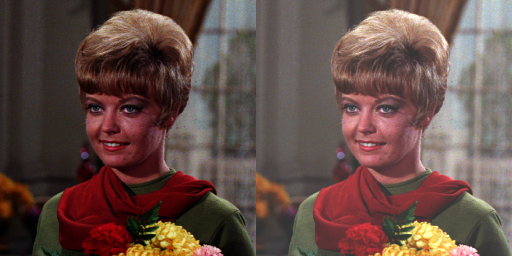

In [4]:
print( 'Mengubah tingkat kecerahan citra ')
print('-----------')
try:
        brightness = int(input('Masukkan nilai kecerahan: ' ))
except ValueError:
          print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff')
brightness_image = np.zeros(original. shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
      for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                      brightness_image[y,x,c] = np. clip (original [y,x,c] + brightness, 8, 255)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

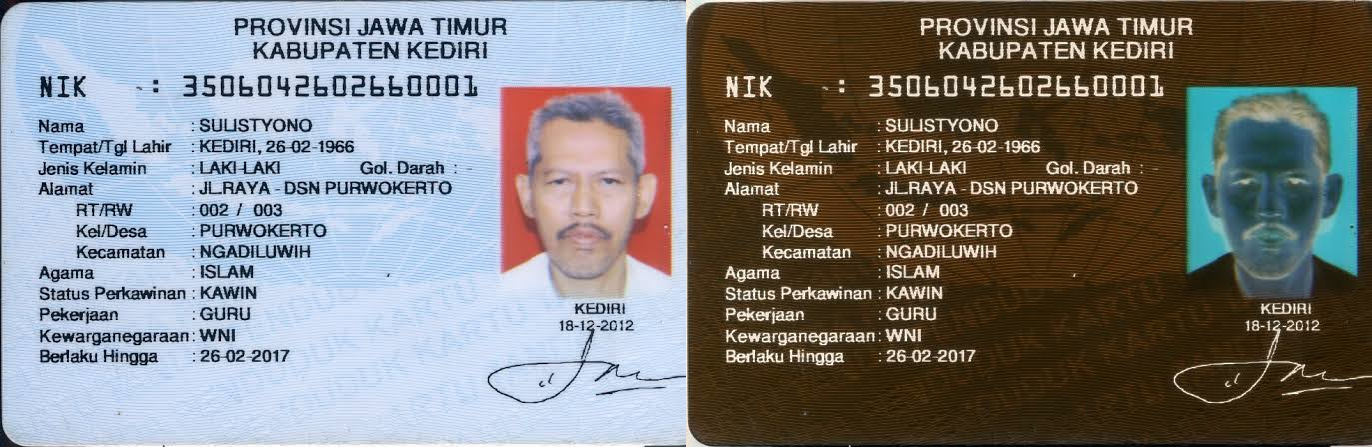

In [62]:
inverted_img = 255 - img
final_frame = cv.hconcat((img, inverted_img))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan dan kontras citra
-----------
Masukkan nilai kecerahan (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): 50
Masukkan nilai kontras (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): 2


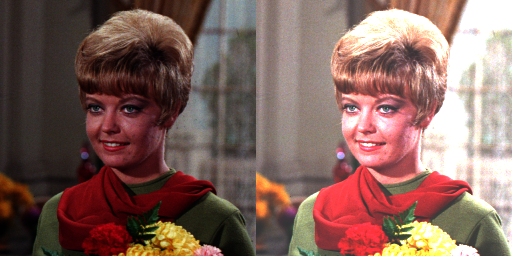

In [6]:
print('Mengubah tingkat kecerahan dan kontras citra')
print('-----------')

try:
    brightness = float(input('Masukkan nilai kecerahan (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): '))
    contrast = float(input('Masukkan nilai kontras (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): '))
except ValueError:
    print('Error, not a number')

# Menghitung citra yang telah diubah kecerahan dan kontrasnya
brightness_contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, brightness_contrast_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Transformasi Logaritmik Kecerahan
-----------
Masukkan nilai konstanta (c): 50


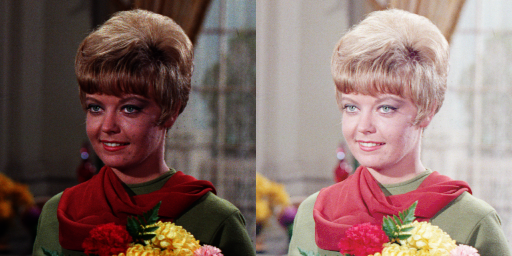

In [13]:
print('Transformasi Logaritmik Kecerahan')
print('-----------')

try:
    c = float(input('Masukkan nilai konstanta (c): '))
except ValueError:
    print('Error, not a number')

template = original.copy()
c = 255 / np.log(256)  # Konstanta untuk transformasi logaritmik
output = c * np.log(1 + original)
output = output.astype(np.uint8)
final_frame = cv.hconcat((original, output))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

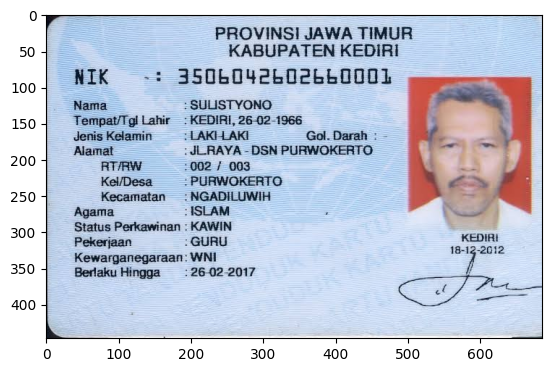

In [29]:
img = cv.imread('/content/drive/MyDrive/PVCK/KTP.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

A. Averaging

Transformasi Logaritmik Kecerahan
-----------


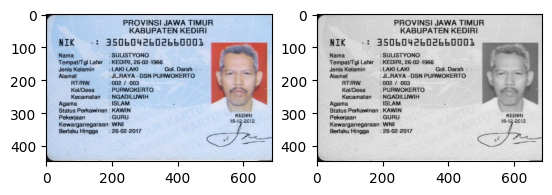

In [30]:
print('Transformasi Logaritmik Kecerahan')
print('-----------')

img_avg = img.copy()
(row, col) = template2.shape[0:2]
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

B. Lightness

Transformasi Logaritmik Kecerahan
-----------


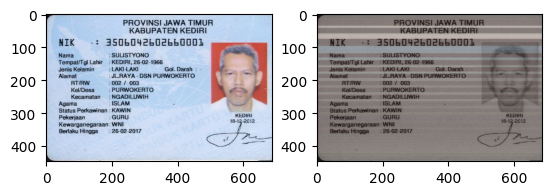

In [31]:
print('Transformasi Logaritmik Kecerahan')
print('-----------')

img_light = img.copy()
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

C. Luminance

Transformasi Logaritmik Kecerahan
-----------


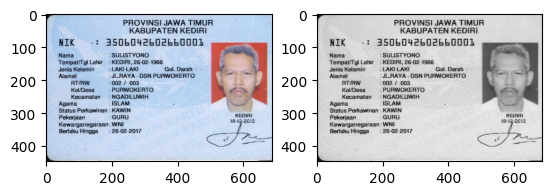

In [33]:
print('Transformasi Logaritmik Kecerahan')
print('-----------')

img_lum = img.copy()
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

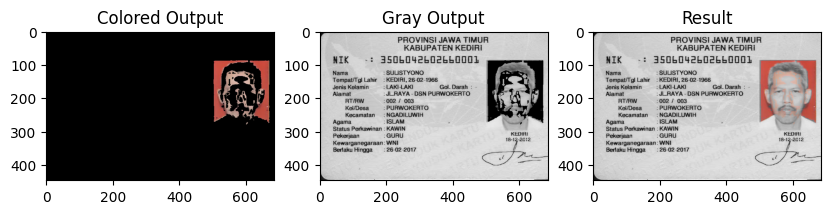

In [65]:
# Ubah gambar dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah gambar ke grayscale dan gabungkan channelnya
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])

# Ubah gambar ke ruang warna HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan batas untuk warna merah dalam ruang warna HSV
lower = np.array([0, 40, 80])
upper = np.array([10, 255, 255])

# Buat mask untuk warna merah
mask = cv.inRange(hsv, lower, upper)

# Ambil bagian merah dari gambar
colored_output = cv.bitwise_and(img, img, mask=mask)

# Ubah bagian non-merah menjadi grayscale
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)

# Gabungkan bagian Merah
result = cv.add(colored_output, gray_output)

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(colored_output, cv.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(gray_output, cv.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result')

plt.show()
